## Image Segmentation

### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift

from PIL import Image
import warnings
warnings.filterwarnings("ignore")
# reduce size of original image to reduce computation time
size = (100,100)

#### function for displaying images

In [3]:
def plot_two_images(figure_title, image1, label1, image2, label2):
    
    fig = plt.figure()
    fig.suptitle(figure_title)

    # Display the first image
    fig.add_subplot(1, 2, 1)
    plt.imshow(image1)
    plt.axis('off')
    plt.title(label1)

    # Display the second image
    fig.add_subplot(1, 2, 2)
    plt.imshow(image2)
    plt.axis('off')
    plt.title(label2)

    plt.show()

In [4]:
def plot_three_images(figure_title, image1, label1, image2, label2, image3, label3):
    
    fig = plt.figure()
    fig.suptitle(figure_title)

    # Display the first image
    fig.add_subplot(1, 3, 1)
    plt.imshow(image1)
    plt.axis('off')
    plt.title(label1)

    # Display the second image
    fig.add_subplot(1, 3, 2)
    plt.imshow(image2)
    plt.axis('off')
    plt.title(label2)

    # Display the third image
    fig.add_subplot(1, 3, 3)
    plt.imshow(image3)
    plt.axis('off')
    plt.title(label3)

    plt.show()

#### Function for applying meanshift algorithm

In [6]:
# The content of this function is written directly at the back without calling
def apply_meanshift(img):
    
    # TODO: Apply Meanshift on image
    # Follow the following hints as per the lab specification.

    # Step 1 - Extract the three RGB colour channels
    
    
    # Step 2 - Combine the three colour channels by flatten each channel 
    # then stacking the flattened channels together.
    # This gives the "colour_samples"
    colour_samples = []
    
    
    # Step 3 - Perform Meanshift clustering
    # For larger images, this may take a few minutes to compute.
    ms_clf = MeanShift(bin_seeding=True)
    ms_labels = ms_clf.fit_predict(colour_samples)

    # Step 4 - reshape ms_labels back to the original image shape 
    # for displaying the segmentation output 
    ms_labels = []

    return ms_labels

#### Function for applying watershed algorithm

In [7]:
# The content of this function is written directly at the back without calling
def apply_watershed(img, threshold=None):
    
    # TODO: Apply Watershed on image
    # Follow the following hints as per the lab specification.

    # Step 1 - Convert the image to gray scale
    # and convert the image to a numpy matrix
    img_grey = 100
    img_array = []
    
    # Step 2 - Calculate the distance transform
    # Hint: use ndi.distance_transform_edt(img_array)
    distance = []
    
    # Step 3 - Generate the watershed markers
    # Hint: use the peak_local_max() function from the skimage.feature library
    # to get the local maximum values and then convert them to markers
    # using ndi.label() -- note the markers are the 0th output to this function
    markers = []
    
    # Step 4 - Perform watershed and store the labels
    # Hint: use the watershed() function from the skimage.morphology library
    # with three inputs: -distance, markers and your image array as a mask
    ws_labels = []
    
    return ws_labels, distance

### Q1. Use the MeanShift algorithm to segment images. Images to be used for this task: `clever-shapes.png` and `coke-bottles.png`


In [21]:
# read two images
img_coke = cv2.imread("coke-bottles.png")
img_coke = cv2.cvtColor(img_coke, cv2.COLOR_BGR2RGB)
img_clever = cv2.imread("clever-shapes.png")
img_clever = cv2.cvtColor(img_clever, cv2.COLOR_BGR2RGB)

In [22]:
red_coke = img_coke[:,:,0]
green_coke = img_coke[:,:,1]
blue_coke = img_coke[:,:,2]

red_clever = img_clever[:,:,0]
green_clever = img_clever[:,:,1]
blue_clever = img_clever[:,:,2]

colour_coke = np.column_stack([red_coke.flatten(),green_coke.flatten(), blue_coke.flatten()])
colour_clever = np.column_stack([red_clever.flatten(),green_clever.flatten(), blue_clever.flatten()])

print(red_coke.shape, red_clever.shape)

(628, 1200) (1080, 1920)


In [23]:
ms_clf = MeanShift(bandwidth = 30, bin_seeding=True)
ms_labels_coke = ms_clf.fit_predict(colour_coke).reshape(628, 1200)
ms_labels_clever = ms_clf.fit_predict(colour_clever).reshape(1080, 1920)

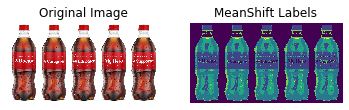

In [24]:
plot_two_images("", img_coke, "Original Image", ms_labels_coke, "MeanShift Labels")

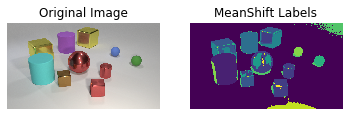

In [25]:
plot_two_images("", img_clever, "Original Image", ms_labels_clever, "MeanShift Labels")

### Q2. Use Watershed transformation to segment images. Images to be used for this task: `clever-shapes.png` and `coke-bottles.png`

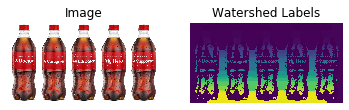

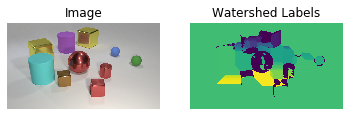

In [30]:
# Loop over the images
two_images=[img_coke, img_clever]
for img_path in two_images:
    # Apply Watershed algorithm
    img_gray = cv2.cvtColor(img_path, cv2.COLOR_RGB2GRAY)
    ret, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY)
    distance = ndi.distance_transform_edt(img_thresh)
    local_maxi = peak_local_max(distance, footprint = np.ones((3,3)), labels = img_thresh)
    mask = np.zeros(distance.shape, dtype = bool)
    mask[tuple(local_maxi.T)]=True
    markers, _ = ndi.label(mask)
    ws_labels = watershed(-distance, markers, mask=img_thresh)
    plot_two_images("", img_path, "Image", ws_labels, "Watershed Labels")

### Q3. Compare MeanShift and Watershed segmentation results. Image to be used for this task: `blueberries.png`

In [18]:
# Read image
img_berry = cv2.imread("blueberries.png")
img_berry = cv2.cvtColor(img_berry, cv2.COLOR_BGR2RGB)

red_berry = img_berry[:,:,0]
green_berry = img_berry[:,:,1]
blue_berry = img_berry[:,:,2]

colour_berry = np.column_stack([red_berry.flatten(),green_berry.flatten(), blue_berry.flatten()])
# print(blue_berry.shape)

ms_clf = MeanShift(bandwidth = 30, bin_seeding=True)
ms_labels_berry = ms_clf.fit_predict(colour_berry).reshape(1500, 2250)
# Apply watershed with global thresholding
img_berry_gray = cv2.cvtColor(img_berry , cv2.COLOR_RGB2GRAY)
ret, img_berry_thresh = cv2.threshold(img_berry_gray, 100, 255, cv2.THRESH_BINARY)
distance = ndi.distance_transform_edt(img_berry_thresh)
local_maxi = peak_local_max(distance, footprint = np.ones((3,3)), labels = img_berry_thresh)
mask = np.zeros(distance.shape, dtype = bool)
mask[tuple(local_maxi.T)]=True
markers, _ = ndi.label(mask)
ws_labels = watershed(-distance, markers, mask=img_berry_thresh)

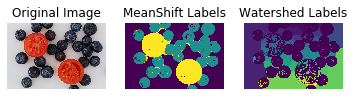

In [20]:
plot_three_images("", img_berry, "Original Image",
                      ms_labels_berry, "MeanShift Labels",
                      ws_labels, "Watershed Labels")